# Mushroom Toxicity Classification Notebook

In this notebook, I'll be developing the model that be used (when given certain structured features) to classify whether or not a mushroom is toxic or not.

I'll be using Scikit-Learn, Matplotlib, NumPy, and Pandas for the most part.

As with other projects, I'll be using the following approach:

1. Problem Definition
2. Exploratory Data Analysis
3. Basic Modelling
4. Evaluation
5. Experimentation
6. Final Conclusions & Model Exportation

## Problem Definition

In a single statement of need:

> Given physical features of a mushroom, can we predict if that mushroom is toxic or not?

The data that will be used for this project is [Mushroom Classification](https://www.kaggle.com/datasets/uciml/mushroom-classification) from Kaggle. The data's source is from the UCI Machine Learning respository — originally donated to UCI ML on April 27, 1987.

Normally, I'd include some sort of evaluation metric, such as "I will pursue this project if the proof of concept gets an initial accuracy of about 90%" or something along those lines, but I'm planning on pursuing this project either way so that's unnecessary. However:

> This model will have minimum of 50% accuracy.

This is calculated by thinking of a uniform chance model (poisonous or edible). Accuracy metric calculated by $ 0.5 * 0.48 + 0.5 * 0.52 = 0.5 $. On second look, this math looks kind of funky, so give me a day or so to remember proper statistics :)

### Features

All here so I don't have to jump back and forth between the website and this notebook.


**Attribute Information**

cap-shape<br>* bell=b<br>* conical=c<br>* convex=x<br>* flat=f<br>*  knobbed=k<br>* sunken=s

cap-surface<br>* fibrous=f<br>* grooves=g<br>* scaly=y<br>* smooth=s

cap-color<br>* brown=n<br>* buff=b<br>* cinnamon=c<br>* gray=g<br>* green=r<br>* pink=p<br>* purple=u<br>* red=e<br>* white=w<br>* yellow=y

bruises<br>* bruises=t<br>* no=f

odor<br>* almond=a<br>* anise=l<br>* creosote=c<br>* fishy=y<br>* foul=f<br>* musty=m<br>* none=n<br>* pungent=p<br>* spicy=s

gill-attachment<br>* attached=a<br>* descending=d<br>* free=f<br>* notched=n

gill-spacing<br>* close=c<br>* crowded=w<br>* distant=d

gill-size<br>* broad=b<br>* narrow=n

gill-color<br>* black=k<br>* brown=n<br>* buff=b<br>* chocolate=h<br>* gray=g<br>*  green=r<br>* orange=o<br>* pink=p<br>* purple=u<br>* red=e<br>* white=w<br>* yellow=y

stalk-shape<br>* enlarging=e<br>* tapering=t

stalk-root<br>* bulbous=b<br>* club=c<br>* cup=u<br>* equal=e<br>* rhizomorphs=z<br>* rooted=r<br>* missing=?

stalk-surface-above-ring<br>* fibrous=f<br>* scaly=y<br>* silky=k<br>* smooth=s

stalk-surface-below-ring<br>* fibrous=f<br>* scaly=y<br>* silky=k<br>* smooth=s

stalk-color-above-ring<br>* brown=n<br>* buff=b<br>* cinnamon=c<br>* gray=g<br>* orange=o<br>* pink=p<br>* red=e<br>* white=w<br>* yellow=y

stalk-color-below-ring<br>* brown=n<br>* buff=b<br>* cinnamon=c<br>* gray=g<br>* orange=o<br>* pink=p<br>* red=e<br>* white=w<br>* yellow=y

veil-type<br>* partial=p<br>* universal=u

veil-color<br>* brown=n<br>* orange=o<br>* white=w<br>* yellow=y

ring-number<br>* none=n<br>* one=o<br>* two=t

ring-type<br>* cobwebby=c<br>* evanescent=e<br>* flaring=f<br>* large=l<br>* none=n<br>* pendant=p<br>* sheathing=s<br>* zone=z

spore-print-color<br>* black=k<br>* brown=n<br>* buff=b<br>* chocolate=h<br>* green=r<br>* orange=o<br>* purple=u<br>* white=w<br>* yellow=y

population<br>* abundant=a<br>* clustered=c<br>* numerous=n<br>* scattered=s<br>* several=v<br>* solitary=y

habitat<br>* grasses=g<br>* leaves=l<br>* meadows=m<br>* paths=p<br>* urban=u<br>* waste=w<br>* woods=d

**classes**

* edible=e
* poisonous=p


### Exploring the Problem Domain

Mushrooms are divided (by class) into either *edible* or *poisonous*. Any mushrooms of inedibility (albeit not poisonous) or unknown toxicity has been sorted into the poisonous class.

#### By Features

**Habitat**

Very self-explanatory. Where the mushroom's habitat was at the time of data generation.

**Population**

How many mushrooms of this type are present in the immediate area?

**Ring Number/Type**

Refers to the annulus of the mushroom, or the ring-like or collar-like thing that some mushrooms possess on their stem/stipe. They are leftovers of the partial veil, which forms after it ruptures to throw out its spores. Number refers to the number of these rings, and type to how they look.

**Spore Print Colour**

By imprinting the gills of a mushroom onto a light (or dark) piece of paper, you can see the colour of its spores. That is what this feature refers to.

**Veil Type/Colour**

A veil is the thin membrane that covers the cap and stalk of an immature mushroom. Most mushrooms form a partial veil that ruptures once the fruiting body has matured. Type refers to universal or partial veil. Colour is self-expanatory.

**Stalk**

Also called a stipe, this is the stem/stalk structure that supports the cap of the mushroom. For stalk shape, this probably refers to the size of the stalk near the base or top. For stalk root, this refers to the type of root at the base of the mushroom. All other feature are self-explanatory.

**Gills**

The thin papery structure that hang vertically underneath the cap. These structures, that look like gills, are used to release spores. Gill attachment likely refers to the shape of the gills on the mushroom head. All other features are self-explanatory.

**Odor**

Self-explanatory.

**Bruises**

Essentially, if you cut into the mushroom, is there discolouration around that cut. In other words, should that mushroom take damage, is there bruising around that damage?

**Cap**

Refers to the head of the mushroom. All features are self-explanatory.


### Limitations of Data

Dataset is *generated* not collected. By this, I mean that this dataset is a hypothetical — the samples are generated from 23 species of gilled mushrooms in the Agaricus and Lepiota Family (from The Audubon Society Field Guide to North American Mushrooms (1981)). 

Thus, the main limitations of the dataset is:

    a) It's purely hypothetical. Because of this, the dataset will likely never be as generalizable as it would be if it used real world samples.
    b) It's generated from only 23 species of two specific families of mushroom. The lack of variety could contribute to the lack of generalizability.
    
Point (a) could be solved by collecting real world samples, but that would be quite time-consuming. Point (b) could be solved by collecting or generating more samples from a wider variety of species.

## Exploratory Data Analysis

I'll begin my exploratory data analysis of the dataset.

Some thing I'd like to investigate:

1. Frequencies of certain features.
2. Which features point most towards poisonous mushrooms.
3. Correlation between some of these "poisonous" features.


#### Loading Data + Basic Analysis of Data

In [1]:
# Import the important stuff

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
data = pd.read_csv("../data/mushrooms.csv")

In [3]:
# Examine the first five samples

data.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [7]:
# The last five samples -> 8124 samples in total

data.tail()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
8119,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l
8123,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,o,c,l


In [6]:
# Check for missing values -> No missing values! Fantastic!

data.isna().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [8]:
# I should check the classes for any imbalances -> Slightly favours edible classes

data['class'].value_counts()

e    4208
p    3916
Name: class, dtype: int64

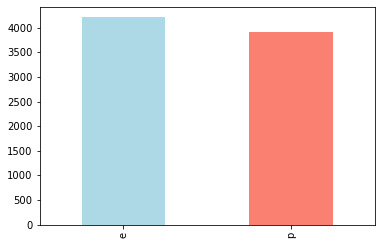

In [11]:
# To put it in a nice looking bar graph

data['class'].value_counts().plot(kind='bar', color=['lightblue', 'salmon']);

In [12]:
# Checking the data frame more thoroughly

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [13]:
data.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [16]:
# From the above, I want to check two categories in particular: gill-attachment and gill-spacing

data['gill-attachment'].value_counts()

f    7914
a     210
Name: gill-attachment, dtype: int64

Only two value types for `gill-attachment`:

* Free
* Attached

The other two possible values are completely absent from the dataset.

In [17]:
data['gill-spacing'].value_counts()

c    6812
w    1312
Name: gill-spacing, dtype: int64

Similar issue for `gill-spacing`. Distant `d` is completely absent. This trend may continue for the rest of the dataset. This is limitations of the dataset rearing its ugly head. The lack of a variety of species is coming back to bite me. Hmm.

Upon closer inspection, `veil-type` only has one type of value! In other words, it's completely irrelevant to determining toxicity. It could be removed entirely, but this seems like a waste of a feature. Perhaps I should look into gathering more data in this sort of format regarding other families of mushroom.

In [22]:
corr_mat = data.corr()
corr_mat

""


KeyError: 'class'

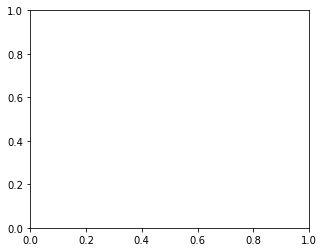

In [20]:
# Let's examine the correlation matrix for 'class'; see which features most correlate with poisonous mushrooms

import seaborn as sns

corr_mat = data.corr()

fig, ax = plt.subplots(figsize=(5, 4))

ax = sns.heatmap(corr_mat['class'],
                annot=True,
                linewidths=0.5,
                fmt='.2f',
                cmap='YlGnBu')